In [1]:
#!pip install ipynb-path
import ipynb_path
import sys 
import os
__file__ = ipynb_path.get()
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..','dbittools','Analysis','Python','read_dbit')))
import read_dbit
import numpy as np
import scanpy as sc
import squidpy as sq
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datadir = os.path.abspath(os.path.join(os.path.dirname(__file__), '..','..','..','data','processed','A22-1650_ONH_01'))

In [21]:
# Must include a library_id name (for plotting below)
adata = read_dbit.read_dbit(path=datadir, count_file='count_file.tsv', library_id="ONH1650_1", load_images=True)
adata.uns['spatial']['ONH1650_1']['scalefactors']['tissue_lowres_scalef'] = 0.725

/Users/mmd47/Dropbox/Workspace/OpticNerveHead_DBiT/Analysis/Python/dbittools/Analysis/Python/read_dbit/read_dbit.py:117: UserWarning: You seem to be missing an image file.
Could not find '/Users/mmd47/Dropbox/Workspace/OpticNerveHead_DBiT/data/processed/A22-1650_ONH_01/spatial/intersections_matx.txt'.
  warn(


Which file do you want to use for in_tissue column creation? These are your choices: intersections_matx.txt, tissue_hires_in_tissue_mask.pngtissue_hires_in_tissue_mask.png


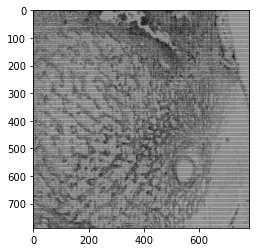

In [4]:
plt.imshow(adata.uns['spatial']['ONH1650_1']['images']['lowres'])

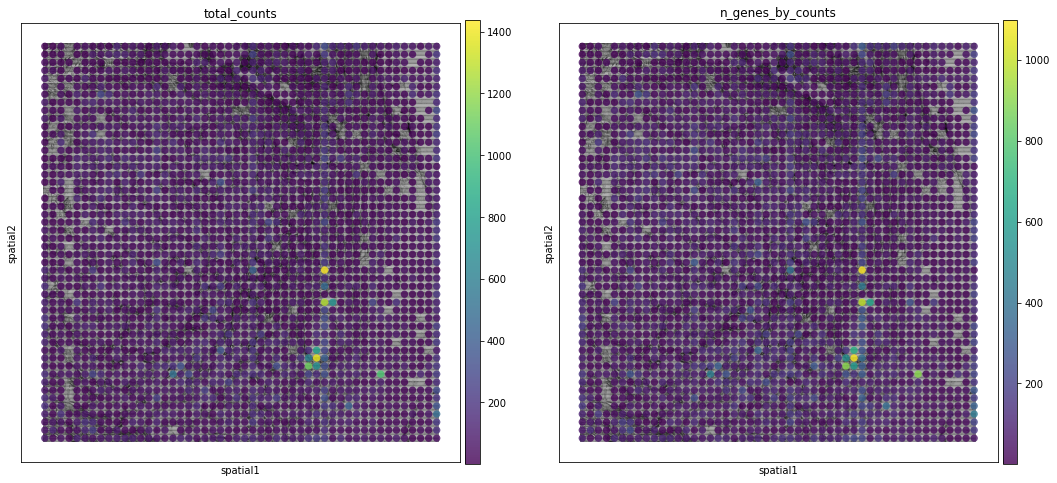

/Users/mmd47/miniconda3/envs/dbitseq/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_genes_by_counts'>

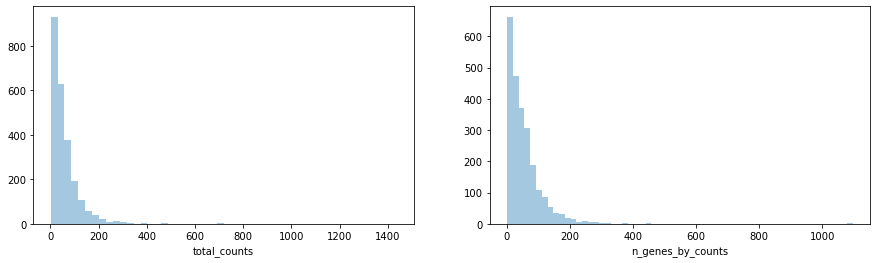

In [22]:

sc.pp.calculate_qc_metrics(adata, inplace=True)
plt.rcParams["figure.figsize"] = (8, 8)
# sc.pl.spatial(adata, img=adata.uns['spatial'][None]['images']['lowres'], 
#               color=["total_counts", "n_genes_by_counts"], spot_size=20, alpha=0.5, scale_factor=1.65)
sc.pl.spatial(adata, img_key="lowres", color=["total_counts", "n_genes_by_counts"], spot_size=20, alpha=0.8)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])


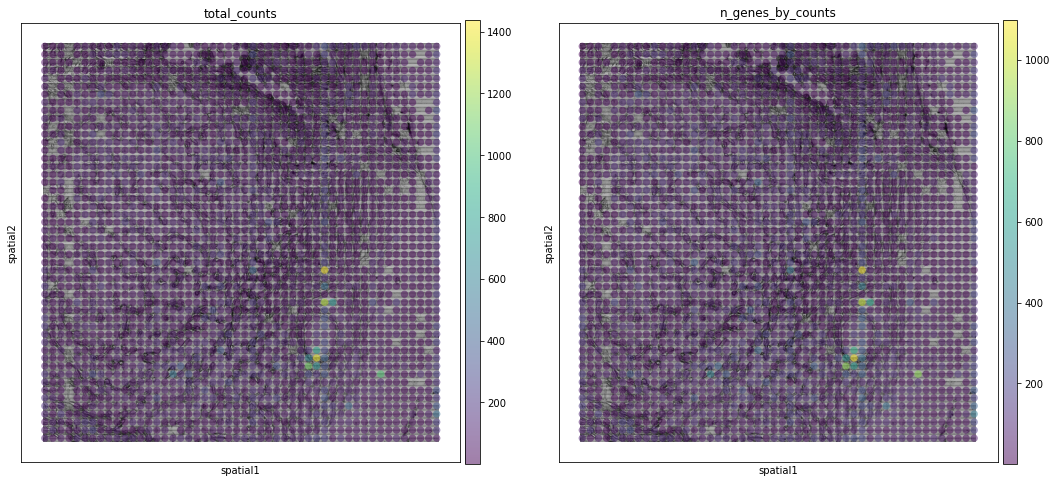

In [23]:
sc.pl.spatial(adata, img_key='lowres', color=["total_counts", "n_genes_by_counts"], spot_size=20, alpha=0.5)

In [7]:
sc.pp.filter_cells(adata, min_counts=20)
sc.pp.filter_cells(adata, max_counts=35000)
sc.pp.filter_genes(adata, min_cells=1)

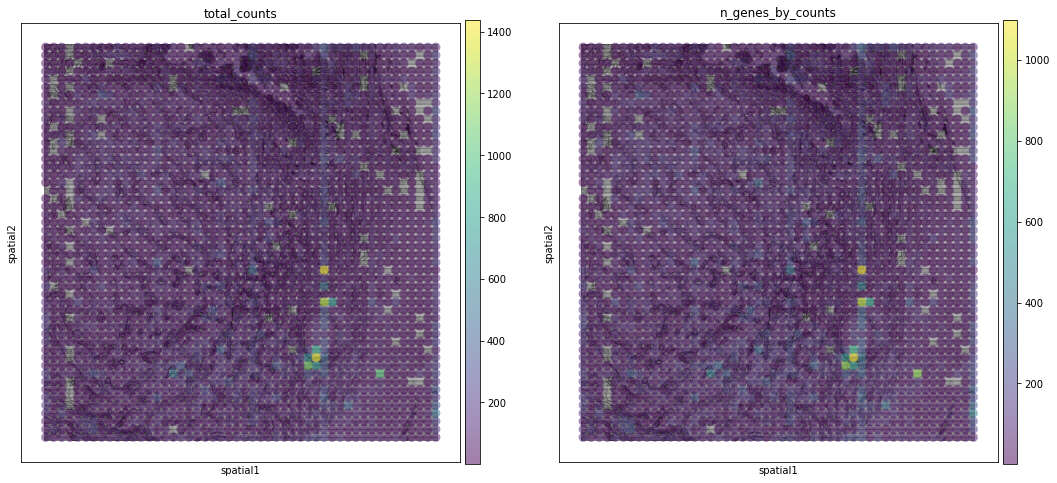

In [25]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="lowres", color=["total_counts", "n_genes_by_counts"], spot_size=25, alpha=0.5)

In [ ]:
sc.pp.log1p(adata)

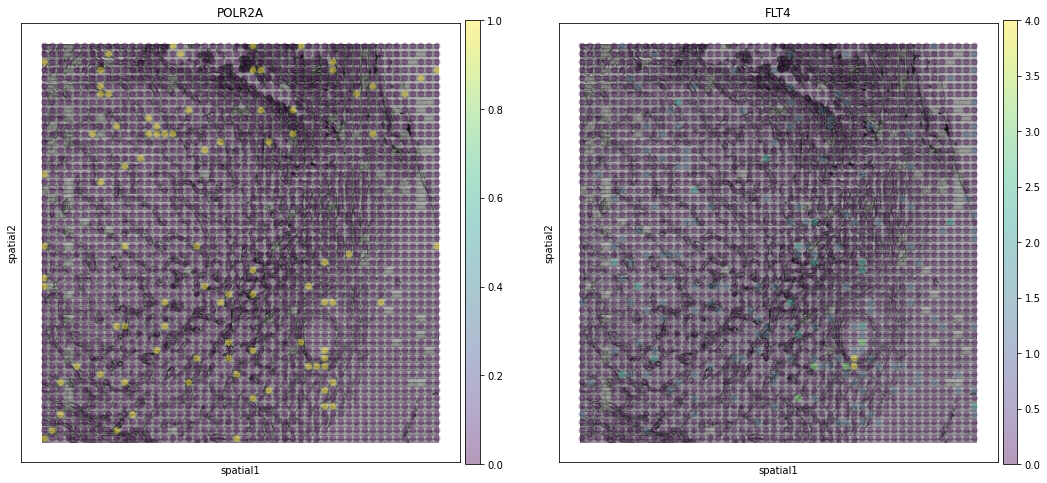

In [29]:
sc.pl.spatial(adata, img_key="lowres", color=["POLR2A","FLT4"], spot_size=18, alpha=0.4)

In [10]:
sc.pp.filter_cells(adata, min_counts=20)
sc.pp.filter_cells(adata, max_counts=35000)
sc.pp.filter_genes(adata, min_cells=1)

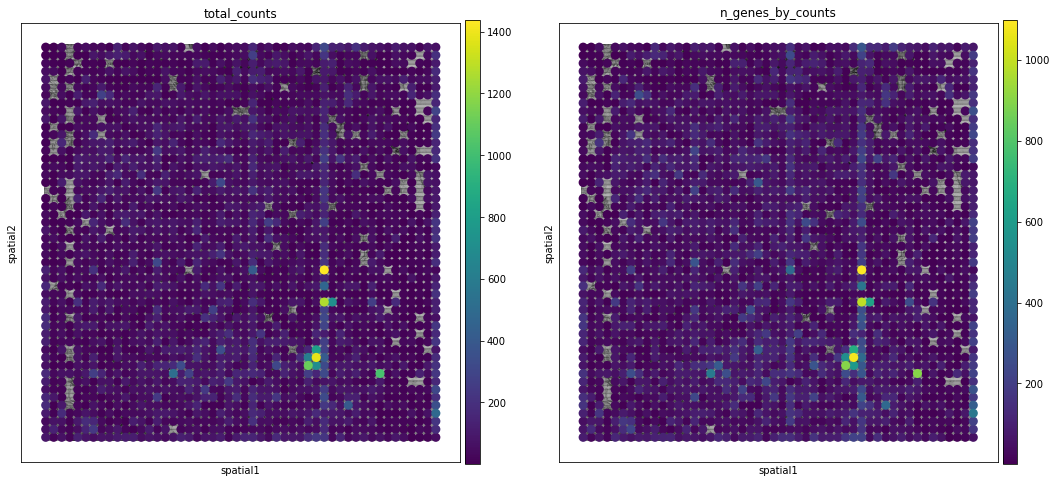

In [30]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="lowres", color=["total_counts", "n_genes_by_counts"], spot_size=25)

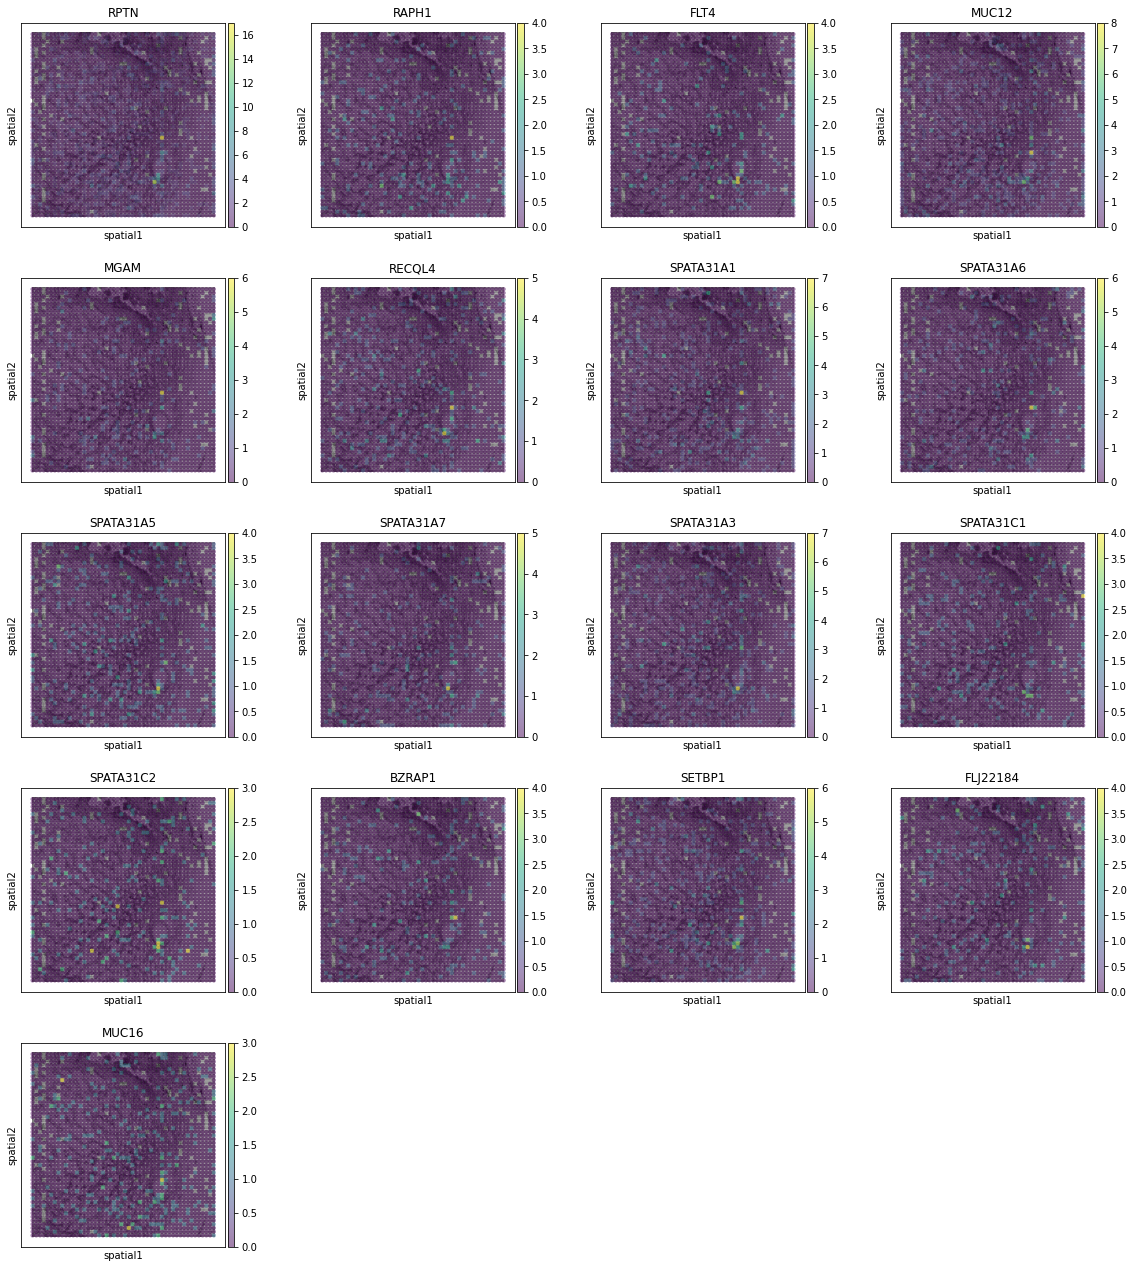

In [49]:
adata_filt = sc.pp.filter_genes(adata, min_counts=220, min_cells=None, max_counts=None, max_cells=None, inplace=False)
mygenes = adata.var_names[adata_filt[0]]
sc.pl.spatial(adata, img_key="lowres", color=mygenes, spot_size=25, alpha=0.5)

In [78]:

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters", resolution=0.4)

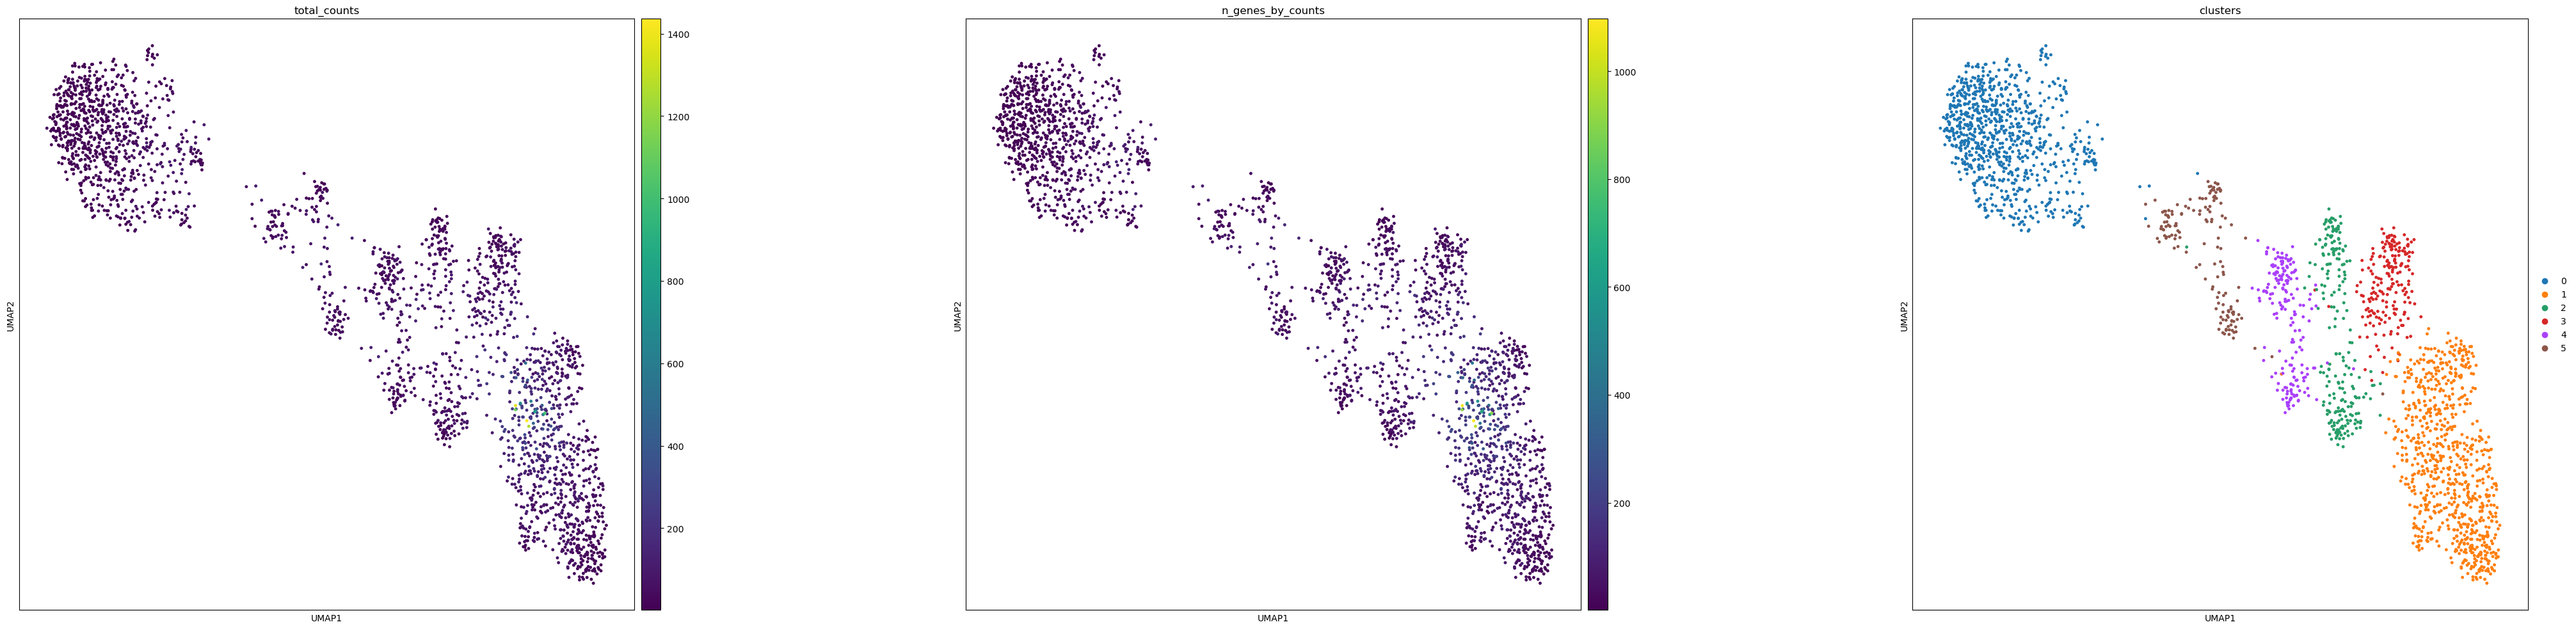

In [75]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100 

sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

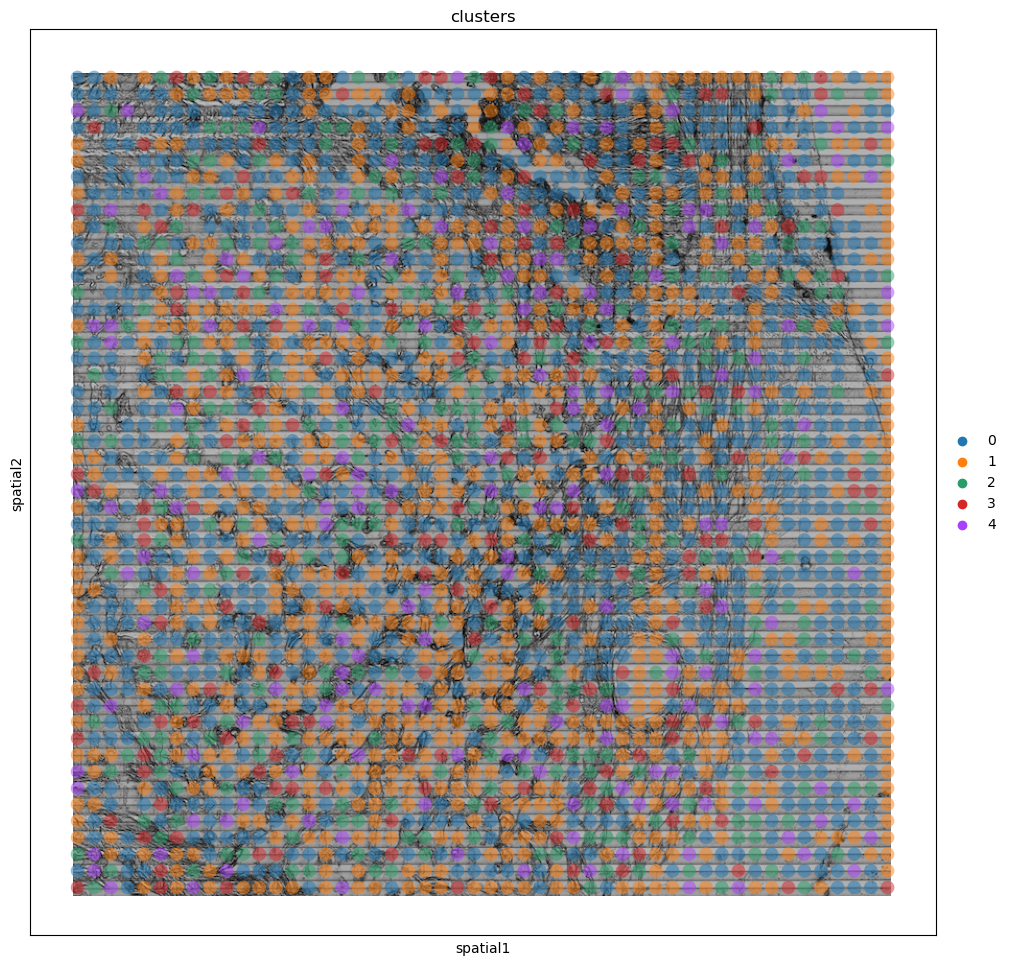

In [79]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100 
sc.pl.spatial(adata, img_key="lowres", color="clusters", spot_size=18, alpha=0.5)

categories: 0, 1, 2, etc.
var_group_labels: Neuron, Other, T-cell


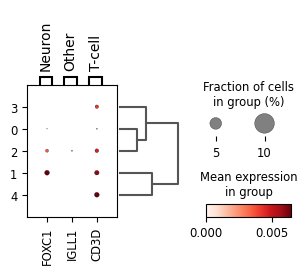

In [82]:
marker_genes_dict = {
    'Neuron': ['FOXC1'],
    'Other': ['IGLL1'],
    'T-cell': ['CD3D'],
}

sc.tl.dendrogram(adata, groupby='clusters')

sc.pl.dotplot(adata, marker_genes_dict, 'clusters', dendrogram=True)

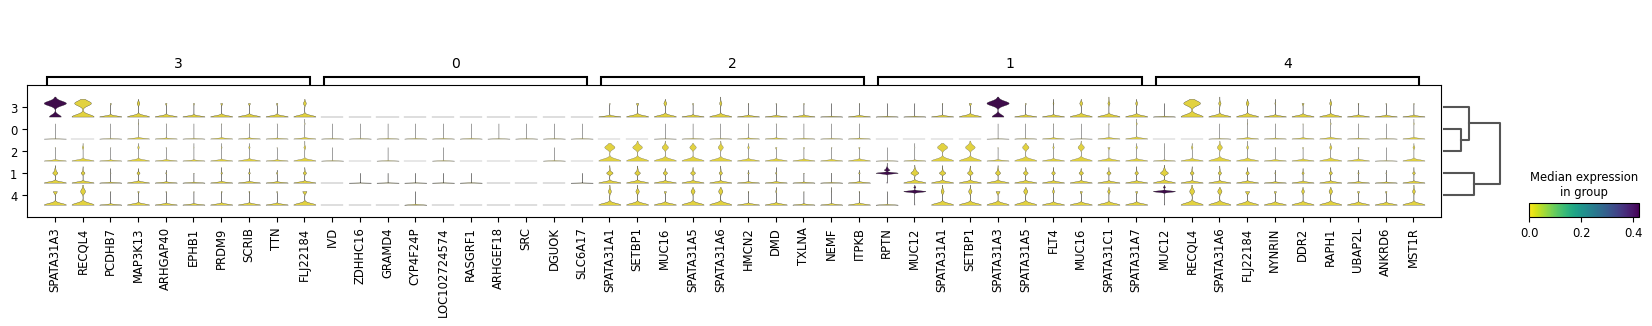

In [83]:

sc.tl.rank_genes_groups(adata, groupby='clusters', method='wilcoxon')
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=10, cmap='viridis_r')

In [86]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100 

sc.pl.heatmap(adata, groupby='clusters')

TypeError: heatmap() missing 1 required positional argument: 'var_names'